# Kraljic Matrix
The Kraljic Matrix is a strategic procurement tool that classifies purchased items and suppliers into four categories—non-critical, leverage, bottleneck and strategic—to help companies develop tailored sourcing strategies.
It uses two key dimensions, supply risk (or complexity) and profit impact (or business impact), to determine where to focus resources, minimize supply chain risks, and maximize purchasing power.
The Two Dimensions
1. Profit Impact (Business Impact):
This dimension measures the value of the purchase to the company, considering factors like cost, quality, and impact on operations.
2. Supply Risk (Supply Market Complexity):
This dimension assesses the difficulty of sourcing the item or service, looking at factors like the number of suppliers, market complexity, and the potential for supply disruptions.
# The Four Categories:
The Kraljic Matrix divides these dimensions into a 2x2 grid, resulting in four quadrants:

Non-Critical Items:
Characteristics: Low profit impact, low supply risk.
Strategy: Streamline processes by using e-procurement, automation, and standardization to reduce administrative effort and costs.

Leverage Items:
Characteristics: High profit impact, low supply risk.
Strategy: Exploit purchasing power to reduce costs. Use tactics like strategic bidding, price negotiations, and supplier diversification to gain the best value.

Bottleneck Items:
Characteristics: Low profit impact, high supply risk.
Strategy: Ensure supply continuity. Focus on managing risk through supplier collaboration, securing long-term contracts, and finding alternative suppliers if possible.

Strategic Items:
Characteristics: High profit impact, high supply risk.
Strategy: Cultivate strong relationships with key suppliers and work collaboratively to manage risk and maximize value. These items are vital to the company's success and require strategic attention.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Practice/realistic_kraljic_dataset.csv')
df.head()

,Product_ID,Product_Name,Supplier_Region,Lead_Time_Days,Order_Volume_Units,Cost_per_Unit,Supply_Risk_Score,Profit_Impact_Score,Environmental_Impact,Single_Source_Risk,Kraljic_Category
0,P001,Semiconductors,South America,81,171,255.03,5,5,4,Yes,Strategic
1,P002,Semiconductors,South America,8,763,380.33,5,4,4,Yes,Strategic
2,P003,Pharma APIs,Asia,65,413,385.24,4,5,5,Yes,Strategic
3,P004,Semiconductors,South America,70,882,287.64,5,5,5,Yes,Strategic
4,P005,Lithium Batteries,Asia,15,120,382.26,4,4,4,Yes,Strategic


In [ ]:
df.shape

(1000, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   object 
 1   Product_Name          1000 non-null   object 
 2   Supplier_Region       1000 non-null   object 
 3   Lead_Time_Days        1000 non-null   int64  
 4   Order_Volume_Units    1000 non-null   int64  
 5   Cost_per_Unit         1000 non-null   float64
 6   Supply_Risk_Score     1000 non-null   int64  
 7   Profit_Impact_Score   1000 non-null   int64  
 8   Environmental_Impact  1000 non-null   int64  
 9   Single_Source_Risk    1000 non-null   object 
 10  Kraljic_Category      1000 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 86.1+ KB


In [ ]:
df['Kraljic_Category'].unique()

array(['Strategic', 'Bottleneck', 'Leverage', 'Non-Critical'],
      dtype=object)

In [ ]:
df['Product_Name'].unique()

array(['Semiconductors', 'Pharma APIs', 'Lithium Batteries', 'AI Chips',
       'Customized Valves', 'Rare Earth Metals', 'Specialty Gases',
       'Catalysts', 'Standard Bolts', 'PVC Pipes', 'Packaging Material',
       'Steel Beams', 'Cleaning Supplies', 'Uniforms', 'Printer Ink',
       'Office Stationery'], dtype=object)

In [ ]:
df['Supplier_Region'].unique()

array(['South America', 'Asia', 'Africa', 'Europe', 'North America',
       'Global'], dtype=object)

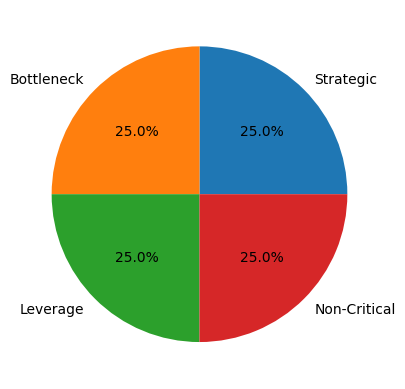

In [ ]:
plt.pie(df['Kraljic_Category'].value_counts(), labels=df['Kraljic_Category'].unique(), autopct='%1.1f%%')
plt.show()

/tmp/ipython-input-3963342951.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Kraljic_Category', y='Cost_per_Unit', data=df, palette='viridis')


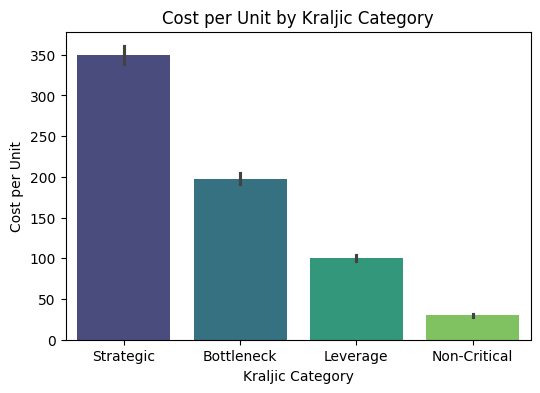

In [ ]:
# Plot Cost per unit by kraljic category
plt.figure(figsize=(6, 4))
sns.barplot(x='Kraljic_Category', y='Cost_per_Unit', data=df, palette='viridis')
plt.title('Cost per Unit by Kraljic Category')
plt.xlabel('Kraljic Category')
plt.ylabel('Cost per Unit')
plt.show()

In [ ]:
# Total 250 Strategic Line Items with Total Cost of 11,930,228,697.24
strategic_items = df.query("Kraljic_Category == 'Strategic'")
strategic_items

,Product_ID,Product_Name,Supplier_Region,Lead_Time_Days,Order_Volume_Units,Cost_per_Unit,Supply_Risk_Score,Profit_Impact_Score,Environmental_Impact,Single_Source_Risk,Kraljic_Category
0,P001,Semiconductors,South America,81,171,255.03,5,5,4,Yes,Strategic
1,P002,Semiconductors,South America,8,763,380.33,5,4,4,Yes,Strategic
2,P003,Pharma APIs,Asia,65,413,385.24,4,5,5,Yes,Strategic
3,P004,Semiconductors,South America,70,882,287.64,5,5,5,Yes,Strategic
4,P005,Lithium Batteries,Asia,15,120,382.26,4,4,4,Yes,Strategic
...,...,...,...,...,...,...,...,...,...,...,...
245,P246,Pharma APIs,Africa,58,247,210.67,4,5,4,Yes,Strategic
246,P247,Semiconductors,Asia,14,662,435.15,4,4,4,Yes,Strategic
247,P248,Pharma APIs,Asia,85,467,224.79,4,5,5,No,Strategic
248,P249,AI Chips,Asia,68,935,276.62,4,5,5,Yes,Strategic


In [ ]:
# Out of 250 Strategic Line Items, 26 Line items with highest Supply Risk and highest Profit Impact with also Single Source Risk belong to disturbed regions of Asia & Africa Regions.
strategic_profitable_risky = df.query("Kraljic_Category == 'Strategic' and Supply_Risk_Score == 5 and Profit_Impact_Score == 5 and Single_Source_Risk == 'Yes' and (Supplier_Region == 'Asia' or Supplier_Region == 'Africa')")
strategic_profitable_risky

,Product_ID,Product_Name,Supplier_Region,Lead_Time_Days,Order_Volume_Units,Cost_per_Unit,Supply_Risk_Score,Profit_Impact_Score,Environmental_Impact,Single_Source_Risk,Kraljic_Category
5,P006,AI Chips,Asia,84,466,405.27,5,5,5,Yes,Strategic
9,P010,Semiconductors,Africa,87,620,204.69,5,5,5,Yes,Strategic
11,P012,Pharma APIs,Africa,41,506,219.07,5,5,5,Yes,Strategic
14,P015,AI Chips,Asia,34,754,381.33,5,5,4,Yes,Strategic
17,P018,Semiconductors,Africa,38,918,266.63,5,5,5,Yes,Strategic
20,P021,Semiconductors,Africa,62,829,359.28,5,5,5,Yes,Strategic
39,P040,AI Chips,Asia,53,363,298.00,5,5,4,Yes,Strategic
66,P067,AI Chips,Africa,23,639,268.82,5,5,5,Yes,Strategic
76,P077,Pharma APIs,Africa,58,197,305.18,5,5,5,Yes,Strategic
79,P080,Lithium Batteries,Africa,22,982,373.89,5,5,4,Yes,Strategic


In [ ]:
# 1% of Total Cost of Strategic Line Items is from High Supply Risk & Single Source Risk in Disturbed Regions(Asia & Africa).
strategic_risk = ((8823*13987)/11930228697.24) * 100
strategic_risk

1.0344085107819407

In [ ]:
# Total 250 Leverage Line Items with Total Cost of 34,524,022,520.72
Leverage_items = df.query("Kraljic_Category == 'Leverage'")
Leverage_items

,Product_ID,Product_Name,Supplier_Region,Lead_Time_Days,Order_Volume_Units,Cost_per_Unit,Supply_Risk_Score,Profit_Impact_Score,Environmental_Impact,Single_Source_Risk,Kraljic_Category
500,P501,Standard Bolts,North America,48,4558,137.41,1,5,1,No,Leverage
501,P502,PVC Pipes,North America,23,1336,87.65,2,4,2,No,Leverage
502,P503,Packaging Material,Asia,65,5204,142.07,2,5,1,No,Leverage
503,P504,Steel Beams,Europe,23,6592,96.63,1,4,1,No,Leverage
504,P505,PVC Pipes,North America,27,2756,126.94,2,3,2,No,Leverage
...,...,...,...,...,...,...,...,...,...,...,...
745,P746,Packaging Material,Europe,45,3486,126.62,1,5,1,No,Leverage
746,P747,Steel Beams,North America,86,8435,116.23,1,4,1,No,Leverage
747,P748,Packaging Material,Asia,40,9708,97.44,1,4,2,No,Leverage
748,P749,Standard Bolts,North America,56,5934,73.29,3,3,1,No,Leverage


In [ ]:
# Out of 250 Leverage Line Items, only 2 Line items with 3 Rated Supply Risk and highest Profit Impact with also Single Source Risk belong to disturbed regions of Asia & Africa Region.
leverage_profitable_risky = df.query("Kraljic_Category == 'Leverage' and Supply_Risk_Score == 3 and Profit_Impact_Score == 5 and Single_Source_Risk == 'Yes' and (Supplier_Region == 'Asia' or Supplier_Region == 'Africa')")
leverage_profitable_risky

,Product_ID,Product_Name,Supplier_Region,Lead_Time_Days,Order_Volume_Units,Cost_per_Unit,Supply_Risk_Score,Profit_Impact_Score,Environmental_Impact,Single_Source_Risk,Kraljic_Category
534,P535,Steel Beams,Asia,79,6313,101.83,3,5,1,Yes,Leverage
546,P547,Standard Bolts,Asia,78,6877,108.84,3,5,2,Yes,Leverage


In [ ]:
# Only 0.008% of Total Cost of Leverage Line Items is from High Supply Risk & Single Source Risk in Disturbed Regions(Asia & Africa).
leverage_risk = ((210.67*13190)/34524022520.72)*100
leverage_risk

0.008048706660216978

In [ ]:
# Total 250 Bottleneck Line Items with Total Cost of 336,525,788,619.
bottleneck_items = df.query("Kraljic_Category == 'Bottleneck'")
bottleneck_items

,Product_ID,Product_Name,Supplier_Region,Lead_Time_Days,Order_Volume_Units,Cost_per_Unit,Supply_Risk_Score,Profit_Impact_Score,Environmental_Impact,Single_Source_Risk,Kraljic_Category
250,P251,Customized Valves,Asia,79,275,223.30,5,3,3,Yes,Bottleneck
251,P252,Rare Earth Metals,Europe,52,163,210.02,4,2,4,Yes,Bottleneck
252,P253,Rare Earth Metals,Asia,24,81,157.18,4,2,4,Yes,Bottleneck
253,P254,Rare Earth Metals,Asia,28,441,192.11,5,3,4,Yes,Bottleneck
254,P255,Customized Valves,Asia,56,318,207.91,5,3,4,Yes,Bottleneck
...,...,...,...,...,...,...,...,...,...,...,...
495,P496,Specialty Gases,Europe,87,236,239.71,4,1,3,Yes,Bottleneck
496,P497,Rare Earth Metals,Europe,83,237,213.55,5,1,4,Yes,Bottleneck
497,P498,Catalysts,Asia,86,169,126.33,5,1,4,Yes,Bottleneck
498,P499,Specialty Gases,Europe,16,296,215.32,5,2,4,Yes,Bottleneck


In [ ]:
# Out of 250 Bottleneck Line Items, only 11 Line items with highest Supply Risk and 3 Rated Profit Impact with also Single Source Risk belong to disturbed regions of Asia & Africa Region.
bottleneck_profitable_risky = df.query("Kraljic_Category == 'Bottleneck' and Supply_Risk_Score == 5 and Profit_Impact_Score == 3 and Single_Source_Risk == 'Yes' and (Supplier_Region == 'Asia' or Supplier_Region == 'Africa')")
bottleneck_profitable_risky

,Product_ID,Product_Name,Supplier_Region,Lead_Time_Days,Order_Volume_Units,Cost_per_Unit,Supply_Risk_Score,Profit_Impact_Score,Environmental_Impact,Single_Source_Risk,Kraljic_Category
250,P251,Customized Valves,Asia,79,275,223.30,5,3,3,Yes,Bottleneck
253,P254,Rare Earth Metals,Asia,28,441,192.11,5,3,4,Yes,Bottleneck
254,P255,Customized Valves,Asia,56,318,207.91,5,3,4,Yes,Bottleneck
281,P282,Specialty Gases,Asia,55,343,257.39,5,3,4,Yes,Bottleneck
287,P288,Catalysts,Asia,46,385,133.21,5,3,3,Yes,Bottleneck
308,P309,Rare Earth Metals,Asia,46,265,273.71,5,3,4,Yes,Bottleneck
408,P409,Rare Earth Metals,Asia,38,232,212.41,5,3,4,Yes,Bottleneck
429,P430,Specialty Gases,Asia,75,88,140.80,5,3,3,Yes,Bottleneck
435,P436,Catalysts,Asia,64,384,128.88,5,3,4,Yes,Bottleneck
444,P445,Catalysts,Asia,84,338,132.27,5,3,4,Yes,Bottleneck


In [ ]:
# Only 0.00213% of Total Cost of Leverage Line Items is from High Supply Risk & Single Source Risk in Disturbed Regions(Asia & Africa).
bottleneck_risk = ((2035.94 * 3522)/336525788619) * 100
bottleneck_risk

0.0021307670682315

In [ ]:
# Total 250 Non-critical Line Items with Total Cost of 23,731,715,246.91
noncritical_items = df.query("Kraljic_Category == 'Non-Critical'")
noncritical_items

,Product_ID,Product_Name,Supplier_Region,Lead_Time_Days,Order_Volume_Units,Cost_per_Unit,Supply_Risk_Score,Profit_Impact_Score,Environmental_Impact,Single_Source_Risk,Kraljic_Category
750,P751,Cleaning Supplies,Global,55,12768,40.71,1,1,1,No,Non-Critical
751,P752,Uniforms,Global,43,15372,42.27,1,1,1,No,Non-Critical
752,P753,Cleaning Supplies,Global,22,18902,21.86,1,2,2,No,Non-Critical
753,P754,Cleaning Supplies,Global,59,19849,29.54,3,1,2,No,Non-Critical
754,P755,Printer Ink,Global,13,19170,35.04,2,2,2,No,Non-Critical
...,...,...,...,...,...,...,...,...,...,...,...
995,P996,Printer Ink,Global,19,19648,10.20,2,1,1,No,Non-Critical
996,P997,Cleaning Supplies,Global,21,19143,15.30,1,2,1,No,Non-Critical
997,P998,Uniforms,Global,70,5352,30.23,1,3,2,No,Non-Critical
998,P999,Printer Ink,Global,44,18070,30.73,1,1,2,No,Non-Critical


In [ ]:
# Out of 250 Bottleneck Line Items, only 5 Line items with 3 Rated Supply Risk and 3 Rated Profit Impact with No Single Source Risk and available Globally.
noncritical_profitable_risky = df.query("Kraljic_Category == 'Non-Critical' and Supply_Risk_Score == 3 and Profit_Impact_Score == 3 and Single_Source_Risk == 'No' and (Supplier_Region == 'Global')")
noncritical_profitable_risky

,Product_ID,Product_Name,Supplier_Region,Lead_Time_Days,Order_Volume_Units,Cost_per_Unit,Supply_Risk_Score,Profit_Impact_Score,Environmental_Impact,Single_Source_Risk,Kraljic_Category
797,P798,Cleaning Supplies,Global,76,15200,16.96,3,3,2,No,Non-Critical
816,P817,Uniforms,Global,32,8735,21.98,3,3,1,No,Non-Critical
846,P847,Printer Ink,Global,31,14126,16.94,3,3,2,No,Non-Critical
853,P854,Office Stationery,Global,40,6386,13.75,3,3,2,No,Non-Critical
868,P869,Printer Ink,Global,41,13343,13.33,3,3,2,No,Non-Critical


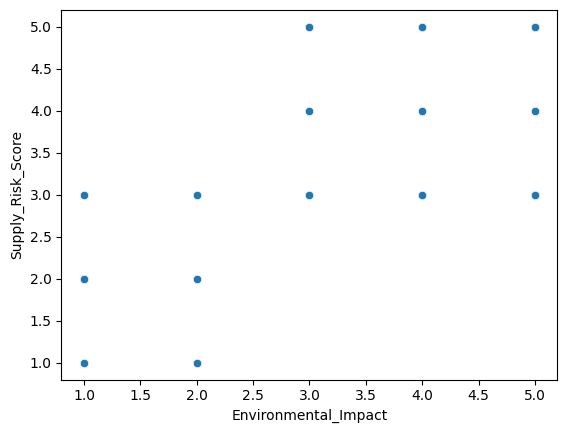

In [ ]:
# Plot correlation Environmental Impact with Supply Risk
sns.scatterplot(x='Environmental_Impact', y='Supply_Risk_Score', data=df)
plt.show()

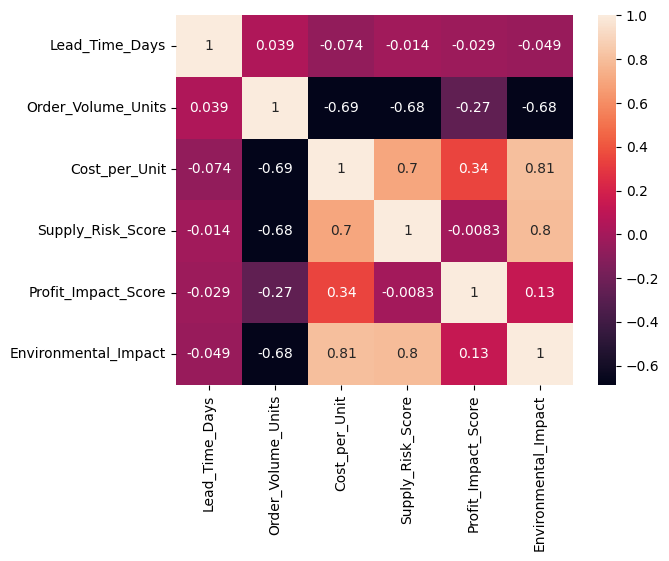

In [ ]:
# Correlation through Heatmap
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True)
plt.show()

In [ ]:
x = df.drop(columns=['Kraljic_Category'])
y = df['Kraljic_Category']

In [ ]:
cat_cols = x.select_dtypes(include='object').columns
num_cols = x.select_dtypes(include='number').columns
print(cat_cols)
print(num_cols)

Index(['Product_ID', 'Product_Name', 'Supplier_Region', 'Single_Source_Risk'], dtype='object')
Index(['Lead_Time_Days', 'Order_Volume_Units', 'Cost_per_Unit',
       'Supply_Risk_Score', 'Profit_Impact_Score', 'Environmental_Impact'],
      dtype='object')


In [ ]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_cat_cols = encoder.fit_transform(x[cat_cols])
encoded_cat_cols.shape

(1000, 1020)

In [ ]:
x_combined = np.hstack((encoded_cat_cols, x[num_cols]))
x_combined.shape

(1000, 1026)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_combined, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(x_test_scaled)

In [ ]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
521,Leverage,Leverage
737,Leverage,Leverage
740,Leverage,Leverage
660,Leverage,Leverage
411,Bottleneck,Bottleneck
...,...,...
408,Bottleneck,Bottleneck
332,Bottleneck,Bottleneck
208,Strategic,Strategic
613,Leverage,Leverage


In [ ]:
print('accuracy score: ', accuracy_score(y_test, y_pred))
print('f1 score: ', f1_score(y_test, y_pred, average='weighted'))
print('recall score: ', recall_score(y_test, y_pred, average='weighted'))
print('precision score: ', precision_score(y_test, y_pred, average='weighted'))

accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision score:  1.0


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Bottleneck       1.00      1.00      1.00        52
    Leverage       1.00      1.00      1.00        55
Non-Critical       1.00      1.00      1.00        49
   Strategic       1.00      1.00      1.00        44

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[52  0  0  0]
 [ 0 55  0  0]
 [ 0  0 49  0]
 [ 0  0  0 44]]
